# Dice Game Monte Carlo 

In [42]:
# Imports 

import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics 
import collections 

In [43]:
def roll_dice():
    return (random.randint(1,6))


#### Expected Value of a Dice Throw 

In [44]:
# Dice throw function
def dice_throw():
    dice_one = roll_dice()
    dice_two = roll_dice()
    
    score = dice_one + dice_two 
    
    # Dice rules 
    if (dice_one == 1) or (dice_two == 1):
        score = 0 
    elif  (dice_one == dice_two):
        score = score * 2 
    return(score)

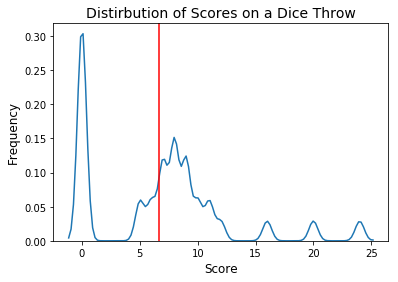

In [45]:
games = []

# Simulate 1,000,000 tosses
for i in range(1000000):
    games.append(dice_throw())

# Plot
sns.kdeplot(games)
plt.axvline(x = statistics.mean(games), color = 'red')
plt.title('Distirbution of Scores on a Dice Throw', fontsize = 14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [46]:
# Get counts of each score
ctr = collections.Counter(games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(12))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
6,0,305770,0.305770
8,8,138870,0.138870
7,7,111338,0.111338
3,9,110679,0.110679
0,5,55754,0.055754
5,11,55560,0.055560
9,6,55369,0.055369
1,10,55352,0.055352
4,24,28033,0.028033
10,20,27789,0.027789


### Toss until you hit 100 

In [47]:
def straight_run_sim():
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    turn_counter = 1
    
    while total_score < 100: 
        # Reset roll
            roll_score = 0

            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1):
                    if total_score == 0:
                        total_score = -50
                        turn_counter += 1
                    else: 
                        total_score = min(0, total_score)
                        turn_counter += 1
                else:
                    dub_counter += 1
                    roll_score = (dice_one + dice_two) * 2
            elif (dice_one == 1 or dice_two == 1):
                total_score = min(0, total_score)
                dub_counter = 0
                turn_counter += 1
            else: 
                roll_score = dice_one + dice_two 
                dub_counter = 0

            # Add your score
            total_score += roll_score 

            # 100 and 3 doubles check
            if total_score == 100:
                total_score = 0
                turn_counter += 1
            elif dub_counter == 3:
                total_score = 0
                turn_counter += 1
    return (turn_counter)



    
    
    

### Check straight run sim

In [48]:
# Turn checker 

for i in range(10):
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    turn_counter = 1
    
    print('\n')

    while total_score < 100: 
        # Reset roll
        roll_score = 0
        
        # Roll dice
        dice_one = roll_dice()
        dice_two = roll_dice()

        # Doubles or not
        if dice_one == dice_two:
            if (dice_one == 1 and dice_two == 1):
                if total_score == 0:
                    total_score = -50
                    turn_counter += 1
                else: 
                    total_score = min(0, total_score)
                    turn_counter += 1
            else:
                dub_counter += 1
                roll_score = (dice_one + dice_two) * 2
        elif (dice_one == 1 or dice_two == 1):
            total_score = min(0, total_score)
            dub_counter = 0
            turn_counter += 1
        else: 
            roll_score = dice_one + dice_two 
            dub_counter = 0

        # Add your score
        total_score += roll_score 

        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1
        elif dub_counter == 3:
            total_score = 0
            turn_counter += 1


        print(turn_counter, dice_one, dice_two, total_score)






2 2 1 0
2 2 3 5
3 1 6 0
3 4 4 16
3 2 6 24
3 2 6 32
4 1 4 0
4 4 6 10
4 5 5 30
4 2 2 38
5 3 3 0
5 3 6 9
5 4 3 16
5 2 2 24
5 6 4 34
5 6 5 45
5 5 3 53
6 1 4 0
6 4 2 6
6 4 6 16
7 6 1 0
7 6 5 11
7 4 5 20
7 3 4 27
7 4 3 34
7 3 6 43
8 1 4 0
9 6 1 0
9 5 4 9
10 5 1 0
10 4 2 6
11 2 1 0
12 6 1 0
12 2 5 7
12 2 5 14
12 4 5 23
13 1 2 0
13 2 4 6
14 2 1 0
14 4 3 7
14 6 4 17
14 2 6 25
14 6 4 35
15 4 1 0
15 4 5 9
15 2 3 14
15 6 5 25
15 5 4 34
15 5 3 42
15 3 3 54
16 1 6 0
16 4 2 6
17 1 6 0
17 3 3 12
18 1 4 0
18 4 2 6
18 6 5 17
19 3 1 0
20 1 6 0
20 5 2 7
20 4 6 17
20 5 2 24
20 6 5 35
20 3 4 42
20 4 4 58
20 4 3 65
20 5 3 73
20 5 3 81
21 1 5 0
21 2 5 7
21 3 5 15
21 4 4 31
21 2 2 39
21 5 3 47
21 4 2 53
21 2 6 61
21 5 5 81
21 6 4 91
22 1 3 0
23 3 1 0
23 3 6 9
23 3 3 21
23 5 4 30
24 1 3 0
24 5 2 7
25 1 1 0
25 3 4 7
26 4 1 0
26 5 6 11
26 2 4 17
26 5 6 28
26 4 5 37
26 2 2 45
27 1 5 0
27 4 6 10
27 6 5 21
27 4 2 27
28 2 1 0
28 3 2 5
29 1 4 0
29 5 5 20
29 5 3 28
29 5 6 39
29 5 5 59
29 3 4 66
29 4 2 72
30 4 1 0
30 

111 3 3 12
111 2 6 20
111 6 2 28
111 5 3 36
111 2 5 43
111 6 4 53
111 5 3 61
112 1 4 0
112 3 3 12
112 3 5 20
112 2 6 28
112 5 6 39
113 6 1 0
113 4 2 6
114 1 3 0
114 2 3 5
114 6 5 16
114 5 6 27
115 1 3 0
115 2 2 8
115 2 6 16
115 3 4 23
115 3 3 35
115 4 2 41
115 5 3 49
115 2 6 57
115 6 6 81
116 1 2 0
116 5 6 11
116 5 5 31
116 4 4 47
117 1 4 0
117 4 3 7
117 4 3 14
117 2 4 20
118 5 1 0
119 2 1 0
119 5 2 7
119 2 4 13
119 3 3 25
119 3 2 30
120 1 6 0
121 1 4 0
121 3 5 8
121 5 6 19
121 5 6 30
121 2 5 37
121 3 5 45
121 4 6 55
122 3 1 0
123 1 1 -50
123 6 4 -40
123 5 5 -20
123 2 4 -14
124 1 1 -14
124 2 3 -9
124 5 5 11
125 2 1 0
125 5 6 11
126 1 2 0
126 6 5 11
126 4 2 17
126 5 3 25
126 5 4 34
127 1 4 0
127 4 2 6
128 1 3 0
128 4 3 7
129 1 2 0
129 2 6 8
130 3 1 0
130 6 2 8
131 1 5 0
131 3 5 8
132 1 3 0
133 2 1 0
134 1 6 0
134 3 5 8
134 6 5 19
134 4 5 28
134 3 4 35
135 1 4 0
135 5 3 8
136 1 4 0
136 5 2 7
136 3 2 12
136 4 5 21
136 6 5 32
137 1 1 0
137 2 3 5
138 1 6 0
138 3 6 9
139 1 2 0
139 5 5 20
139

62 2 1 0
62 5 4 9
62 4 5 18
62 2 4 24
62 4 6 34
63 4 1 0
63 3 5 8
63 6 4 18
63 2 3 23
63 3 5 31
63 5 5 51
63 2 6 59
63 4 4 75
63 3 4 82
64 6 1 0
65 1 5 0
65 5 4 9
66 1 2 0
66 3 3 12
66 4 2 18
66 5 4 27
67 1 6 0
68 5 1 0
69 6 1 0
69 3 6 9
69 5 3 17
69 5 2 24
69 6 2 32
69 4 5 41
69 3 2 46
70 6 1 0
70 6 6 24
71 2 1 0
71 5 4 9
72 4 1 0
72 2 5 7
72 4 5 16
72 6 6 40
72 2 2 48
72 6 3 57
73 1 6 0
73 2 4 6
73 5 6 17
73 4 2 23
74 1 1 0
74 5 6 11
74 6 3 20
74 5 5 40
74 3 6 49
75 1 5 0
76 1 6 0
76 6 4 10
77 2 1 0
78 1 6 0
78 3 4 7
79 1 1 0
79 6 2 8
80 5 1 0
81 5 1 0
81 2 5 7
81 6 2 15
81 5 6 26
81 3 4 33
81 6 5 44
82 3 1 0
83 1 3 0
83 4 2 6
83 2 6 14
84 1 1 0
84 6 2 8
84 3 5 16
84 6 5 27
85 1 2 0
85 5 3 8
85 4 6 18
85 2 4 24
85 6 4 34
85 3 3 46
85 4 3 53
86 1 4 0
87 4 1 0
87 2 4 6
87 3 5 14
88 1 4 0
89 2 1 0
90 1 2 0
90 5 3 8
90 6 4 18
90 3 4 25
91 1 1 0
92 6 1 0
92 6 2 8
92 6 5 19
92 6 2 27
92 3 6 36
92 6 5 47
93 2 1 0
93 3 6 9
93 2 2 17
93 2 4 23
93 2 5 30
93 3 2 35
93 6 6 59
93 2 2 67
94 1 2 0


In [49]:
straight_games = []

# Simulate 1,000,000 tosses
for i in range(100000):
    straight_games.append(straight_run_sim())

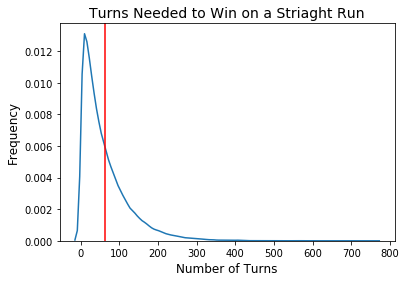

In [50]:
# Plot
sns.kdeplot(straight_games)
plt.axvline(x = statistics.mean(straight_games), color = 'red')
plt.title('Turns Needed to Win on a Striaght Run', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [51]:
statistics.mean(straight_games)

62.43497

In [52]:
# Get counts of each score
ctr = collections.Counter(straight_games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(len(ctr)))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
35,1,1664,0.001664
36,2,1635,0.001635
25,3,1618,0.001618
7,5,1502,0.001502
22,6,1499,0.001499
5,4,1486,0.001486
71,9,1462,0.001462
16,7,1413,0.001413
3,10,1369,0.001369
18,11,1339,0.001339


In [53]:
statistics.mean(games)

6.667441

### Toss just once per turn 

In [85]:
def one_roll_sim():
    
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    roll_counter = 0
    turn_counter = 1

    while total_score < 100:

        # Reset turn 
        dub_counter = 0 
        dice_one = 0 
        dice_two = 0
        roll_score = 0 
        roll_counter = 0 

        while roll_counter < 1: 

            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1): #redundant but w/e
                    if total_score == 0:
                        total_score = -50
                        roll_counter += 1
                    else: 
                        total_score = 0
                        roll_counter += 1
                else: # do not increment roll_counter
                    dub_counter += 1
                    roll_score = roll_score + (dice_one + dice_two) * 2
                    if dub_counter == 3: #unless it's your third double 
                        total_score = 0
                        roll_counter += 1
            elif (dice_one == 1 or dice_two == 1):
                roll_score = 0
                roll_counter += 1
            else: 
                roll_score = roll_score + (dice_one + dice_two) #if you rolled roll_score not 0
                roll_counter += 1

        turn_counter += 1
        total_score += roll_score 
        
        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1

    return(turn_counter)

In [86]:
one_roll_games = []

# Simulate 100,000 tosses
for i in range(100000):
    one_roll_games.append(one_roll_sim())

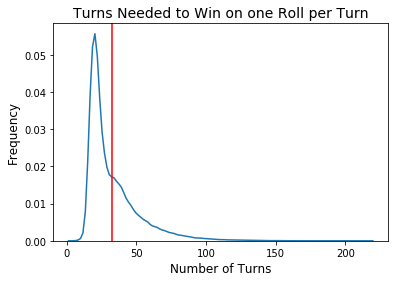

In [87]:
# Plot
sns.kdeplot(one_roll_games)
plt.axvline(x = statistics.mean(one_roll_games), color = 'red')
plt.title('Turns Needed to Win on one Roll per Turn', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [80]:
# Get counts of each score
ctr = collections.Counter(one_roll_games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(len(ctr)))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
6,20,60414,0.060414
9,19,59312,0.059312
24,21,55639,0.055639
11,18,54241,0.054241
2,22,48651,0.048651
4,17,43520,0.043520
8,23,41514,0.041514
0,24,34758,0.034758
21,16,29666,0.029666
18,25,28999,0.028999


In [88]:
statistics.mean(one_roll_games)
#min(one_roll_games)

32.74618

While one roll per turn has a much lower expected number of turns (33.6), I would argue it's an even worse strategy than rolling until you hit 100 or 0. As the probability of winning in under 10 turns is ____.

In [67]:
## Check 1 roll sims

total_score = 0 
dub_counter = 0
roll_score = 0
dice_one = 0
dice_two = 0
roll_counter = 0
turn_counter = 1

while total_score < 100:

    # Reset turn 
    dub_counter = 0 
    dice_one = 0 
    dice_two = 0
    roll_score = 0 
    roll_counter = 0 

    while roll_counter < 1: 

        # Roll dice
        dice_one = roll_dice()
        dice_two = roll_dice()

        # Doubles or not
        if dice_one == dice_two:
            if (dice_one == 1 and dice_two == 1):
                if total_score == 0:
                    total_score = -50
                    roll_counter += 1
                else: 
                    total_score = 0
                    roll_counter += 1
            else: # do not increment roll_counter
                dub_counter += 1
                roll_score = roll_score + (dice_one + dice_two) * 2
        elif (dice_one == 1 or dice_two == 1):
            roll_score = 0
            roll_counter += 1
        else: 
            roll_score = dice_one + dice_two 
            roll_counter += 1

        print(turn_counter, dice_one, dice_two, roll_score, total_score)

    turn_counter += 1
    total_score += roll_score 



1 3 6 9 0
2 3 2 5 9
3 1 6 0 14
4 5 2 7 14
5 6 6 24 21
5 1 6 0 21
6 3 2 5 21
7 3 3 12 26
7 4 1 0 26
8 2 1 0 26
9 2 1 0 26
10 6 1 0 26
11 1 3 0 26
12 1 2 0 26
13 6 4 10 26
14 6 2 8 36
15 4 3 7 44
16 1 4 0 51
17 4 1 0 51
18 3 2 5 51
19 4 3 7 56
20 6 3 9 63
21 2 4 6 72
22 6 5 11 78
23 6 3 9 89
24 4 2 6 98


### Multi-Toss Turns

In [91]:

def multi_roll_turn(n):
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    roll_counter = 0
    turn_counter = 1

    while total_score < 100:

        # Reset turn 
        dub_counter = 0 
        dice_one = 0 
        dice_two = 0
        roll_score = 0 
        roll_counter = 0 

        while roll_counter < n: 

            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1): #redundant but w/e
                    if total_score == 0:
                        total_score = -50
                        roll_counter = n
                    else: 
                        total_score = 0
                        roll_counter = n
                else: # TODO logic for doubles
                    dub_counter += 1
                    roll_counter += 1 

                    if roll_counter == n: # you have to roll again on doubles 
                        roll_counter -= 1 

                    roll_score = roll_score + (dice_one + dice_two) * 2
                    if dub_counter == 3: # wipe turn if 3rd double  
                        total_score = 0
                        roll_counter = n
            elif (dice_one == 1 or dice_two == 1):
                roll_score = 0
                roll_counter = n
            else: 
                roll_score = roll_score + (dice_one + dice_two) 
                roll_counter += 1

        turn_counter += 1
        total_score += roll_score 

        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1
    
    return (turn_counter)


In [111]:
multi_roll_turn(3)

5

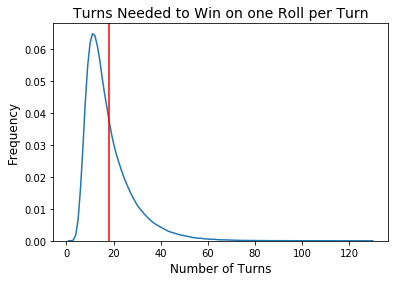

18.06136

In [122]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(300000):
    multi_roll_games.append(multi_roll_turn(2))
    
# Plot
sns.kdeplot(multi_roll_games)
plt.axvline(x = statistics.mean(multi_roll_games), color = 'red')
plt.title('Turns Needed to Win on 2 Rolls per Turn', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

statistics.mean(multi_roll_games)

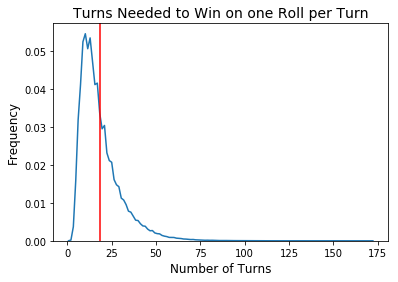

18.552116666666667

In [123]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(300000):
    multi_roll_games.append(multi_roll_turn(3))
    
# Plot
sns.kdeplot(multi_roll_games)
plt.axvline(x = statistics.mean(multi_roll_games), color = 'red')
plt.title('Turns Needed to Win on 3 Rolls per Turn', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

statistics.mean(multi_roll_games)

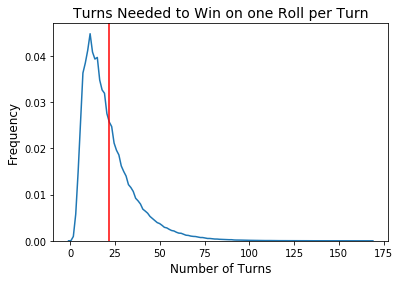

21.37751

In [124]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(300000):
    multi_roll_games.append(multi_roll_turn(4))
    
# Plot
sns.kdeplot(multi_roll_games)
plt.axvline(x = statistics.mean(multi_roll_games), color = 'red')
plt.title('Turns Needed to Win on 4 Rolls per Turn', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

statistics.mean(multi_roll_games)

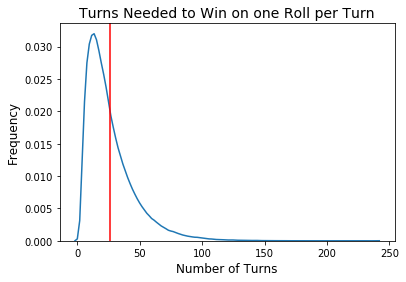

26.302986666666666

In [125]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(300000):
    multi_roll_games.append(multi_roll_turn(5))
    
# Plot
sns.kdeplot(multi_roll_games)
plt.axvline(x = statistics.mean(multi_roll_games), color = 'red')
plt.title('Turns Needed to Win on 5 Rolls per Turn', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

statistics.mean(multi_roll_games)

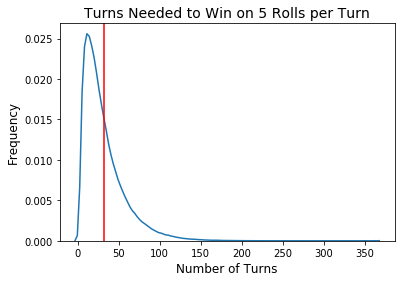

31.95127

In [126]:
multi_roll_games = []

# Simulate 100,000 tosses
for i in range(300000):
    multi_roll_games.append(multi_roll_turn(6))
    
# Plot
sns.kdeplot(multi_roll_games)
plt.axvline(x = statistics.mean(multi_roll_games), color = 'red')
plt.title('Turns Needed to Win on 5 Rolls per Turn', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

statistics.mean(multi_roll_games)